In [1]:
#Random Forest Assignment with the Glass dataset.

In [29]:
#Interview Answers


🔹 Bagging vs Boosting

Bagging (Bootstrap Aggregating)

Creates multiple subsets of data using random sampling with replacement.

Each subset trains a weak learner (e.g., decision tree).

Final prediction = majority vote (classification) or average (regression).

Helps reduce variance and avoid overfitting.

Example: Random Forest.

Boosting

Sequentially trains weak learners (each model learns from the errors of the previous one).

Misclassified points get higher weights.

Final prediction = weighted vote of all learners.

Helps reduce bias and improve accuracy.

Example: AdaBoost, Gradient Boosting, XGBoost.

🔹 Handling Imbalance in Data

Resampling techniques:

Oversampling minority class (SMOTE).

Undersampling majority class.

Class Weights:

Use class_weight="balanced" in sklearn models.

Evaluation metrics:

Use F1-score, Precision, Recall, ROC-AUC instead of accuracy.

Available Sheets: ['Description', 'glass']

✅ Data Loaded. Shape: (214, 10)
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Missing values:
 RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Columns in dataset: Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

✅ Train shape: (149, 9) Test shape: (65, 9)

Accuracy Score: 0.8461538461538461

Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.95      0.89        21
           2       0.86      0.83      0.84        23
           3       1.00     

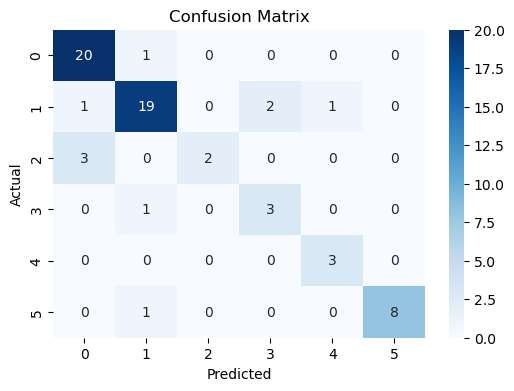

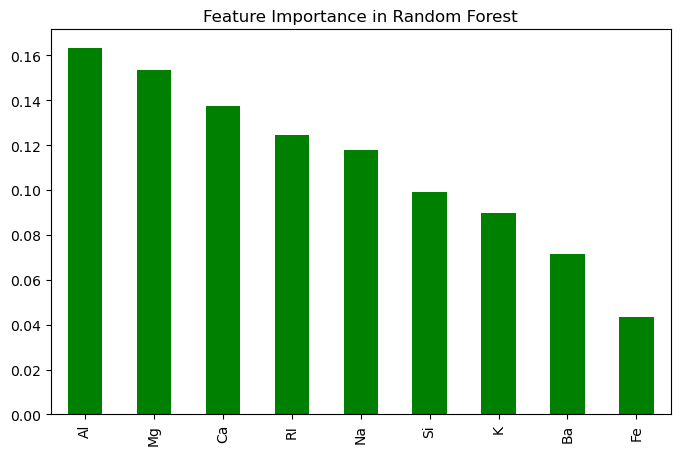


Top Important Features:
Al    0.163387
Mg    0.153383
Ca    0.137310
RI    0.124625
Na    0.117858
dtype: float64

Class distribution in Target:
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [9]:
# ==============================
# Random Forest on Glass Dataset
# ==============================

# ✅ Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# ✅ Step 2: Load Data (from second sheet of Excel file)
file_path = r"glass.xlsx"
xls = pd.ExcelFile(file_path)
print("Available Sheets:", xls.sheet_names)

# Assuming second sheet has actual data
data = pd.read_excel(file_path, sheet_name=xls.sheet_names[1])
print("\n✅ Data Loaded. Shape:", data.shape)
print(data.head())

# ✅ Step 3: Check for missing values
print("\nMissing values:\n", data.isnull().sum())

# ✅ Step 4: Check column names
print("\nColumns in dataset:", data.columns)

# ✅ Step 5: Separate Features and Target
# Target column is assumed to be 'Type'
X = data.drop('Type', axis=1)
y = data['Type']

# ✅ Step 6: Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print("\n✅ Train shape:", X_train.shape, "Test shape:", X_test.shape)

# ✅ Step 7: Scale Features (optional but good practice for distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Step 8: Train Random Forest Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# ✅ Step 9: Predictions
y_pred = rf.predict(X_test)

# ✅ Step 10: Evaluation Metrics
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ✅ Step 11: Feature Importance
feature_importance = pd.Series(rf.feature_importances_, index=data.drop('Type', axis=1).columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(8,5), color='green')
plt.title("Feature Importance in Random Forest")
plt.show()

# ✅ Step 12: Observations
print("\nTop Important Features:")
print(feature_importance.sort_values(ascending=False).head())

# ✅ BONUS: Check Class Distribution
print("\nClass distribution in Target:")
print(y.value_counts())

# ✅ If you want to avoid FutureWarning in AdaBoost:
# Use algorithm='SAMME' instead of SAMME.R when you try AdaBoost later
